In [1]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
er = pd.read_csv (r'C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\Predittori\Employment rate.csv')

In [3]:
df=pd.DataFrame(er)
print(df)

     LOCATION INDICATOR SUBJECT    MEASURE FREQUENCY     TIME     Value  \
0         AUS       EMP     TOT  PC_WKGPOP         Q  1978-Q2  64.51980   
1         AUS       EMP     TOT  PC_WKGPOP         Q  1978-Q3  64.36215   
2         AUS       EMP     TOT  PC_WKGPOP         Q  1978-Q4  64.21537   
3         AUS       EMP     TOT  PC_WKGPOP         Q  1979-Q1  64.18578   
4         AUS       EMP     TOT  PC_WKGPOP         Q  1979-Q2  64.17709   
...       ...       ...     ...        ...       ...      ...       ...   
3954      CRI       EMP     TOT  PC_WKGPOP         Q  2020-Q2  49.69787   
3955      CRI       EMP     TOT  PC_WKGPOP         Q  2020-Q3  52.40552   
3956      CRI       EMP     TOT  PC_WKGPOP         Q  2020-Q4  55.25658   
3957      CRI       EMP     TOT  PC_WKGPOP         Q  2021-Q1  56.04257   
3958      CRI       EMP     TOT  PC_WKGPOP         Q  2021-Q2  55.59557   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4        

In [4]:
print(df["LOCATION"].unique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'EST' 'ISR' 'SVN' 'ZAF' 'OECD'
 'G-7' 'EA19' 'COL' 'LVA' 'LTU' 'EU27_2020' 'RUS' 'CRI']


In [6]:
#selection of Italy
df=df[df["LOCATION"]=="ITA"]

In [7]:
df["QUARTER"]=df["TIME"].str[6:7].astype(int)
df.drop(["Flag Codes","SUBJECT","MEASURE"], axis=1, inplace=True)
print(df)

     LOCATION INDICATOR FREQUENCY     TIME     Value  QUARTER
1223      ITA       EMP         Q  1998-Q1  51.63791        1
1224      ITA       EMP         Q  1998-Q2  51.87399        2
1225      ITA       EMP         Q  1998-Q3  52.07743        3
1226      ITA       EMP         Q  1998-Q4  52.19458        4
1227      ITA       EMP         Q  1999-Q1  52.42956        1
...       ...       ...       ...      ...       ...      ...
1312      ITA       EMP         Q  2020-Q2  57.01668        2
1313      ITA       EMP         Q  2020-Q3  57.67551        3
1314      ITA       EMP         Q  2020-Q4  58.47471        4
1315      ITA       EMP         Q  2021-Q1  57.23040        1
1316      ITA       EMP         Q  2021-Q2  57.74583        2

[94 rows x 6 columns]


In [8]:
#check if there are duplicate in time
df[df.duplicated('TIME')]

,LOCATION,INDICATOR,FREQUENCY,TIME,Value,QUARTER


In [9]:
#computation of the rate
df=df.sort_values(['TIME'])
df['Previous Value'] = df.sort_values('TIME').groupby('QUARTER')['Value'].shift(1) 

In [10]:
print(df)

     LOCATION INDICATOR FREQUENCY     TIME     Value  QUARTER  Previous Value
1223      ITA       EMP         Q  1998-Q1  51.63791        1             NaN
1224      ITA       EMP         Q  1998-Q2  51.87399        2             NaN
1225      ITA       EMP         Q  1998-Q3  52.07743        3             NaN
1226      ITA       EMP         Q  1998-Q4  52.19458        4             NaN
1227      ITA       EMP         Q  1999-Q1  52.42956        1        51.63791
...       ...       ...       ...      ...       ...      ...             ...
1312      ITA       EMP         Q  2020-Q2  57.01668        2        58.93628
1313      ITA       EMP         Q  2020-Q3  57.67551        3        59.05666
1314      ITA       EMP         Q  2020-Q4  58.47471        4        59.28461
1315      ITA       EMP         Q  2021-Q1  57.23040        1        59.16529
1316      ITA       EMP         Q  2021-Q2  57.74583        2        57.01668

[94 rows x 7 columns]


In [12]:
df["ER"]=df["Value"]/df["Previous Value"]
df2=df[pd.notnull(df["ER"])]
df2=df2[["TIME","QUARTER","Value","ER"]]
print(df2)

         TIME  QUARTER     Value        ER
1227  1999-Q1        1  52.42956  1.015331
1228  1999-Q2        2  52.60624  1.014116
1229  1999-Q3        3  52.79292  1.013739
1230  1999-Q4        4  52.94587  1.014394
1231  2000-Q1        1  53.01252  1.011119
...       ...      ...       ...       ...
1312  2020-Q2        2  57.01668  0.967429
1313  2020-Q3        3  57.67551  0.976613
1314  2020-Q4        4  58.47471  0.986339
1315  2021-Q1        1  57.23040  0.967297
1316  2021-Q2        2  57.74583  1.012788

[90 rows x 4 columns]


In [13]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

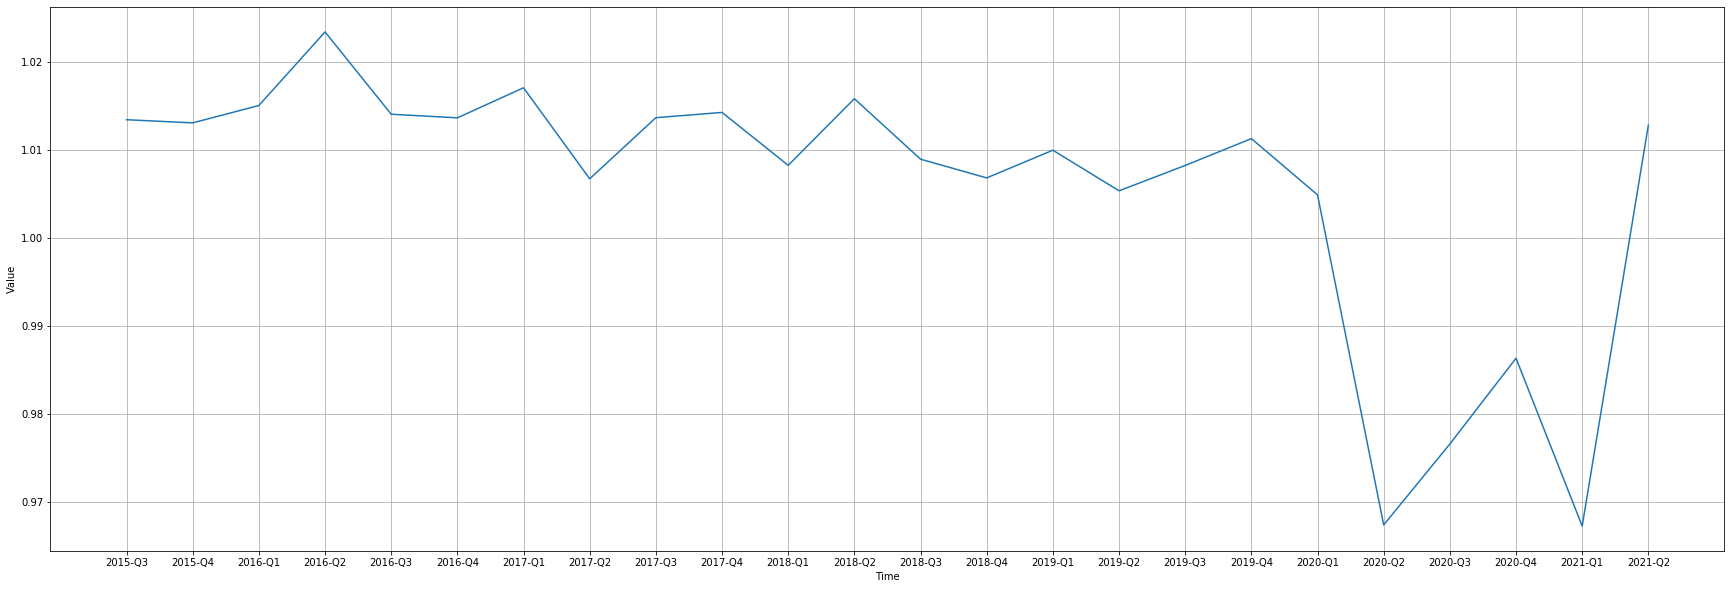

In [17]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(df["TIME"], df["ER"],start=70, end=100)

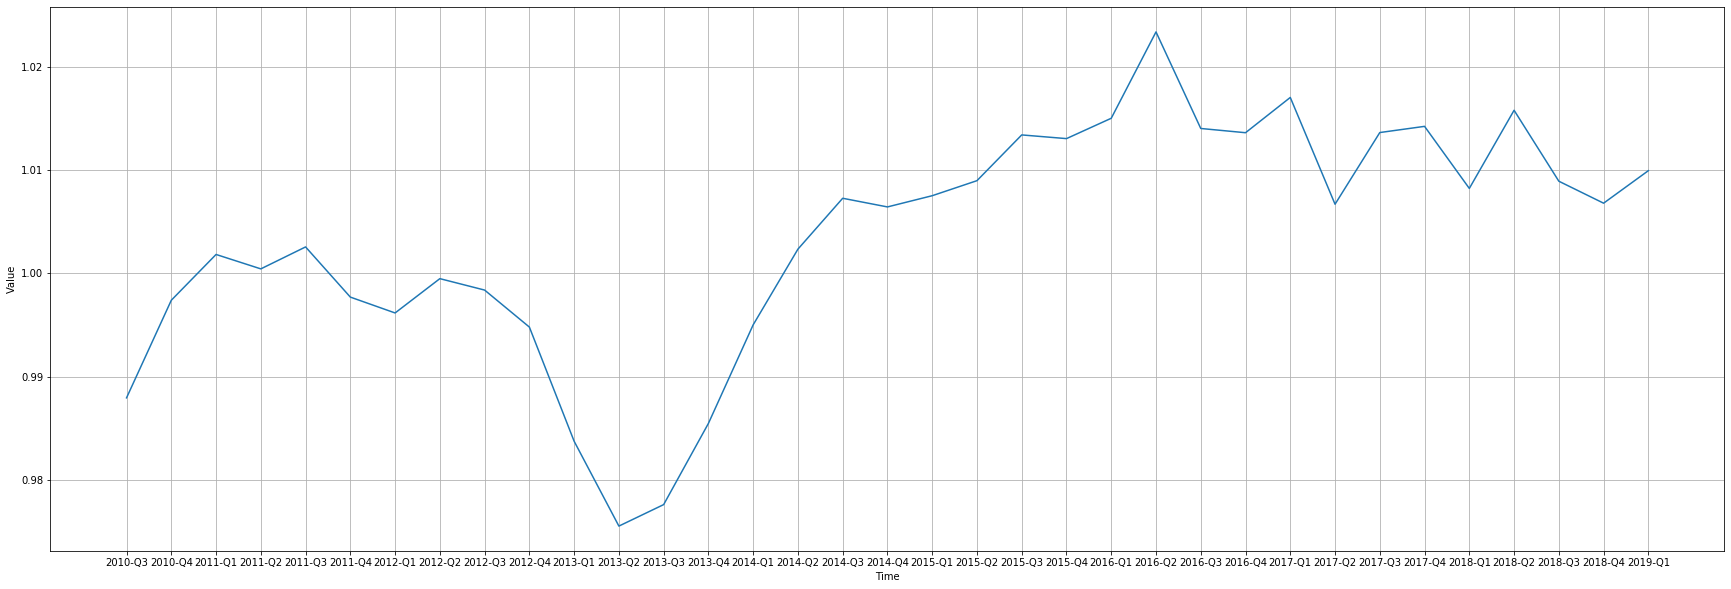

In [21]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(df["TIME"], df["ER"],start=50, end=85)

In [22]:
df2.to_pickle(r"C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\DF_PKL\er_df.pkl")